In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#1
data = pd.read_excel('/content/banklist.csv.xlsx')
banks = pd.DataFrame(data)
banks



,Index,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,1,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,2,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,3,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,4,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,5,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18
...,...,...,...,...,...,...,...,...
426,427,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19
427,428,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18
428,429,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18
429,430,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17


In [ ]:
#2
banks.head()


,Index,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,1,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,2,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,3,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,4,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,5,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18


In [ ]:
#3
banks.columns

Index(['Index', 'Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [ ]:
#4
banks['ST'].value_counts(5)

,proportion
ST,
GA,0.178654
IL,0.127610
FL,0.118329
CA,0.071926
MN,0.044084
TX,0.027842
AZ,0.027842
WA,0.027842
MO,0.025522


In [ ]:
#5
banks['ST'].unique()

array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'NY', 'OR', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

In [ ]:
#6
#banks.columns = banks.columns.str.strip()
banks_failures = banks["ST"].value_counts()
top5_bank = banks_failures.head(5)

print("Top 5 state with most failed bank:", top5_bank)

Top 5 state with most failed bank: ST
GA    77
IL    55
FL    51
CA    31
MN    19
Name: count, dtype: int64


In [ ]:
#7
banks['Acquiring Institution'].head(5)

,Acquiring Institution
0,"United Fidelity Bank, fsb"
1,First-Citizens Bank & Trust Company
2,Whitney Bank
3,Cache Valley Bank
4,State Bank of Texas


In [ ]:
#8

acquired_by_state_bank_of_texas = banks[banks['Acquiring Institution'] == 'State Bank of Texas']

total_acquired = len(acquired_by_state_bank_of_texas)
in_texas = len(acquired_by_state_bank_of_texas[acquired_by_state_bank_of_texas['ST'] == 'TX'])

print(f"Total banks acquired by State Bank of Texas: {total_acquired}")
print(f"Banks acquired by State Bank of Texas located in Texas: {in_texas}")

Total banks acquired by State Bank of Texas: 3
Banks acquired by State Bank of Texas located in Texas: 1


In [ ]:
#9
#What is the most common city in California for a bank to fail in?

failures_by_city = {
    "Chicago, IL": 20,
    "Atlanta, GA": 10,
    "Phoenix, AZ": 6,
    "Los Angeles, CA": 4,
    "San Francisco, CA": 3,

}

ca = {city: count for city, count in failures_by_city.items() if city.endswith(", CA")}

most_common = max(ca.items(), key=lambda x: x[1])

print(f"Most common California city for bank failures: {most_common[0]} ({most_common[1]} failures)")


Most common California city for bank failures: Los Angeles, CA (4 failures)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.read_excel('/content/Historical_Automobile_Sales.xlsx')

In [ ]:
sales = pd.DataFrame(data1)
sales

,Index,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,478,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
478,479,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
479,480,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
480,481,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [25]:
#1.
chart1 = sales.groupby("Year")["Automobile_Sales"].mean().reset_index()
chart1

,Year,Automobile_Sales
0,1980,678.950000
1,1981,633.408333
2,1982,631.150000
3,1983,2889.350000
4,1984,2972.250000
5,1985,3176.133333
6,1986,2341.133333
7,1987,2288.166667
8,1988,3074.500000
9,1989,3247.608333


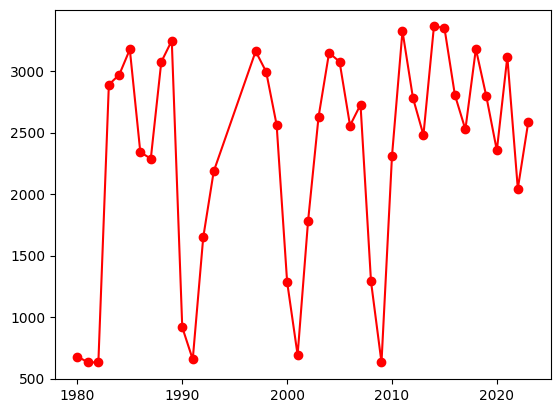

In [63]:
#1.linechart
plt.plot(chart1["Year"], chart1["Automobile_Sales"],color='Red', marker='o')
plt.show()

In [46]:
#2.

reccesion_data = sales[sales["Recession"]==1]
#groupby
chart2 = reccesion_data.groupby(["Year","Vehicle_Type"])["Automobile_Sales"].sum().reset_index()
chart2

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,2882.5
1,1980,Smallfamiliycar,2085.7
2,1980,Supperminicar,3179.2
3,1981,Mediumfamilycar,1885.2
4,1981,Smallfamiliycar,3192.1
5,1981,Supperminicar,2523.6
6,1982,Mediumfamilycar,5062.9
7,1982,Smallfamiliycar,2408.9
8,1982,Sports,102.0
9,1983,Smallfamiliycar,589.0


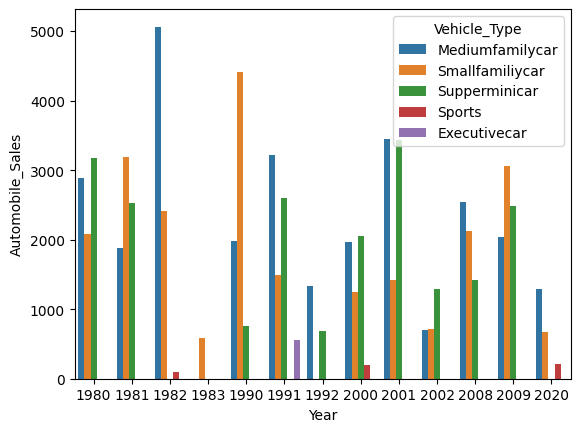

In [59]:
#2
sns.barplot(data=chart2,x="Year",y="Automobile_Sales",hue="Vehicle_Type")
plt.show()

In [85]:
#3
recession_1= sales[sales["Recession"]==1]
non_recession_0 = sales[sales["Recession"]==0]
#groupby
chart3 = sales.groupby(["Year",'Recession',"Vehicle_Type"])["Automobile_Sales"].sum().reset_index()
chart3

,Year,Recession,Vehicle_Type,Automobile_Sales
0,1980,1,Mediumfamilycar,2882.5
1,1980,1,Smallfamiliycar,2085.7
2,1980,1,Supperminicar,3179.2
3,1981,1,Mediumfamilycar,1885.2
4,1981,1,Smallfamiliycar,3192.1
...,...,...,...,...
181,2022,0,Sports,4596.5
182,2023,0,Executivecar,1579.6
183,2023,0,Smallfamiliycar,10658.5
184,2023,0,Sports,12401.0


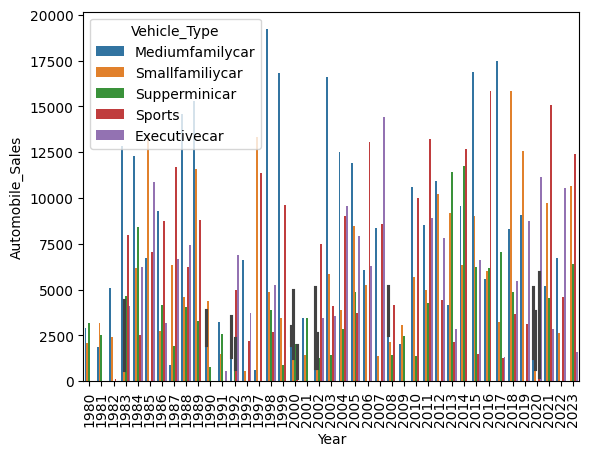

In [101]:
sns.barplot(data=chart3, x="Year", y="Automobile_Sales", hue= "Vehicle_Type")
plt.xticks(rotation=90)
plt.show()

In [102]:
#4
chart4 = sales.groupby(["Vehicle_Type","Recession"])["Automobile_Sales"].mean().reset_index()
chart4

,Vehicle_Type,Recession,Automobile_Sales
0,Executivecar,0,2701.435484
1,Executivecar,1,564.000000
2,Mediumfamilycar,0,2867.200370
3,Mediumfamilycar,1,674.847619
4,Smallfamiliycar,0,2850.305333
5,Smallfamiliycar,1,650.733333
6,Sports,0,2950.052439
7,Sports,1,170.333333
8,Supperminicar,0,2546.690476
9,Supperminicar,1,659.270968


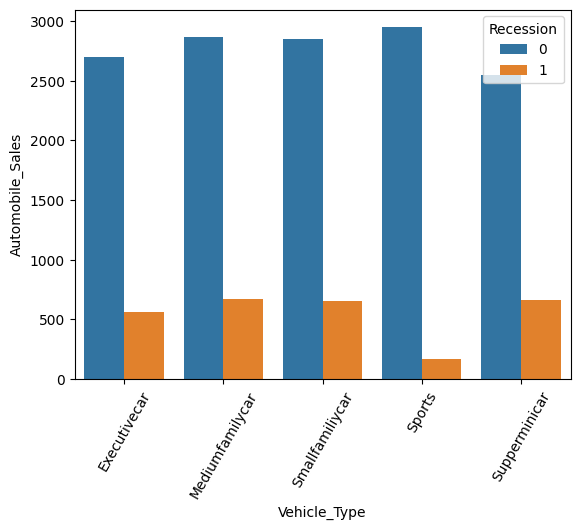

In [106]:
#4
sns.barplot(data=chart4,
            x='Vehicle_Type',
            y='Automobile_Sales',
            hue='Recession',
            )
plt.xticks(rotation=60)
plt.show()